# **Importing malaria dataset from kaggle**

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shriyanshgaur","key":"f306d5fccebb267dbe5dac34a6f9fb89"}'}

In [7]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 69 Aug 27 17:00 kaggle.json


In [8]:
!pip install -q kaggle

In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/



In [10]:
!chmod 600 /root/.kaggle/kaggle.json

In [11]:
!pwd

/content


In [12]:
!kaggle datasets list

ref                                                    title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
deepcontractor/mcdonalds-india-menu-nutrition-facts    McDonald's India : Menu Nutrition Dataset          5KB  2022-07-28 17:08:52           3796        155  0.9411765        
iamsouravbanerjee/house-rent-prediction-dataset        House Rent Prediction Dataset                     82KB  2022-08-20 13:49:03           3986        139  1.0              
iamsouravbanerjee/world-population-dataset             World Population Dataset                          17KB  2022-08-27 08:29:18            300         44  1.0              
arianazmoudeh/airbnbopendata                           Airbnb Open Data                                  10MB  2022-08-0

# **Downloading the dataset**

In [13]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria


 99% 666M/675M [00:05<00:00, 106MB/s] 
100% 675M/675M [00:05<00:00, 123MB/s]


In [14]:
!unzip cell-images-for-detecting-malaria.zip

Streaming output truncated to the last 5000 lines.
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: cell_i

# **Importing Required Modules and Libraries**

In [15]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping 
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from tensorflow.keras.applications import resnet50
from keras.models import *
from keras.layers import *
import keras
import warnings
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3, preprocess_input
warnings.filterwarnings('ignore')

# **Reading The File Names**

In [16]:
for dirname, _, filenames in os.walk('cell_images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
cell_images/Parasitized/C188P149ThinF_IMG_20151203_134419_cell_196.png
cell_images/Parasitized/C67P28N_ThinF_IMG_20150819_132441_cell_165.png
cell_images/Parasitized/C118P79ThinF_IMG_20151002_105735_cell_137.png
cell_images/Parasitized/C82P43ThinF_IMG_20150817_124418_cell_176.png
cell_images/Parasitized/C175P136NThinF_IMG_20151127_141428_cell_226.png
cell_images/Parasitized/C132P93ThinF_IMG_20151004_151733_cell_185.png
cell_images/Parasitized/C180P141NThinF_IMG_20151201_165601_cell_174.png
cell_images/Parasitized/C97P58ThinF_IMG_20150917_151903_cell_26.png
cell_images/Parasitized/C125P86ThinF_IMG_20151004_102053_cell_149.png
cell_images/Parasitized/C118P79ThinF_IMG_20151002_110725_cell_148.png
cell_images/Parasitized/C101P62ThinF_IMG_20150923_170344_cell_80.png
cell_images/Parasitized/C133P94ThinF_IMG_20151004_155331_cell_126.png
cell_images/Parasitized/C39P4thinF_original_IMG_20150622_114804_cell_39.png
cell_images/Parasitized/C39P4th

# **Data Preparation and Preprocessing**

In [17]:
def data_prep(parasitized,uninfected):

    parasitized= ["cell_images/Parasitized" + '/' +  parasitize for parasitize in parasitized]
    uninfected= ["cell_images/Uninfected" + '/' +  uninfect for uninfect in uninfected]

    labels = len(parasitized)*['parasitized'] + len(uninfected)*['uninfected']
    data = parasitized + uninfected

    return pd.DataFrame({'Image_Path': data , 'Labels': labels})


df = data_prep(os.listdir('cell_images/Parasitized/'), os.listdir('cell_images/Uninfected/'))
df.head()

,Image_Path,Labels
0,cell_images/Parasitized/C113P74ThinF_IMG_20150...,parasitized
1,cell_images/Parasitized/C67P28N_ThinF_IMG_2015...,parasitized
2,cell_images/Parasitized/C93P54ThinF_IMG_201508...,parasitized
3,cell_images/Parasitized/C39P4thinF_original_IM...,parasitized
4,cell_images/Parasitized/C133P94ThinF_IMG_20151...,parasitized


# **Displaying 5 Images For Each Of The Two Labels of dataset**

Displaying 5 Parasitized Images: 



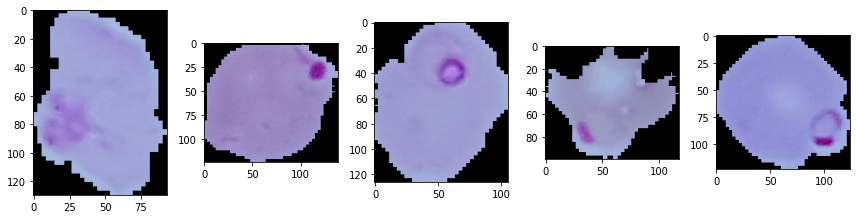


Displaying 5 Uninfected Images: 



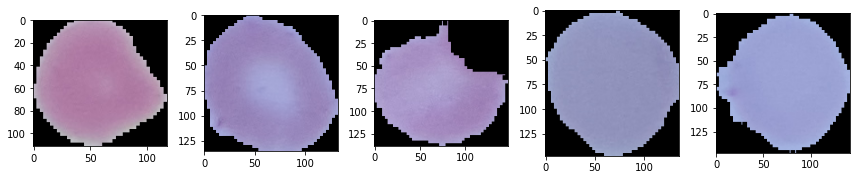

In [18]:
print("Displaying 5 Parasitized Images: ")
print()
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread(df[df['Labels'] == 'parasitized']['Image_Path'][i])
    plt.imshow(img)
    plt.tight_layout()
plt.show()


print()
print("Displaying 5 Uninfected Images: ")
print()
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread(df[df['Labels'] == 'uninfected']['Image_Path'].reset_index(drop=True)[i])
    plt.imshow(img)
    plt.tight_layout()
plt.show()

# **Distribution Of Samples according to categories**




Text(0.5, 1.0, 'Distribution of samples according to the categories')

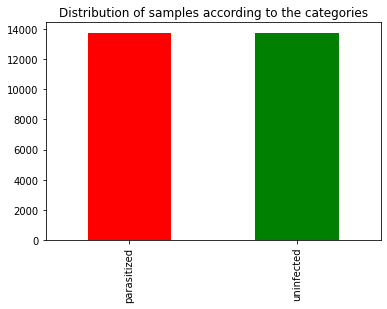

In [19]:
df['Labels'].value_counts().plot(kind = 'bar', color = ['red', 'green'])
plt.title('Distribution of samples according to the categories')

# **DATA Augmentation**

In [20]:
train, test = train_test_split(df, test_size = .20)

img_datagen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest', validation_split=0.2)
                               
                               
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

# **Defining Graphical view**

In [21]:
def plot_loss_and_accuracy(mo_fit):
    accuracy = mo_fit.history['accuracy']
    loss = mo_fit.history['loss']
    validation_loss = mo_fit.history['val_loss']
    validation_accuracy = mo_fit.history['val_accuracy']



    plt.figure(figsize=(15, 7))
    plt.subplot(2, 2, 1)
    plt.plot(range(len(accuracy)), accuracy, label='Training Accuracy')
    plt.plot(range(len(accuracy)), validation_accuracy, label='Validation Accuracy')
    plt.legend(loc='upper left')
    plt.title('Accuracy : Training Vs Validation ')



    plt.subplot(2, 2, 2)
    plt.plot(range(len(accuracy)), loss, label='Training Loss')
    plt.plot(range(len(accuracy)), validation_loss, label='Validation Loss')
    plt.title('Loss : Training Vs Validation ')
    plt.legend(loc='upper right')
    plt.show()

# **Building Convolutional Neural Networks(CNN) MODEL**

Found 17638 validated image filenames belonging to 2 classes.
Found 1102 validated image filenames belonging to 2 classes.
Epoch 1/4
100/100 [==============================] - 50s 485ms/step - loss: 2.2541 - accuracy: 0.4730 - val_loss: 0.6943 - val_accuracy: 0.4910
Epoch 2/4
100/100 [==============================] - 48s 483ms/step - loss: 0.6925 - accuracy: 0.5650 - val_loss: 0.6684 - val_accuracy: 0.6210
Epoch 3/4
100/100 [==============================] - 38s 384ms/step - loss: 0.6899 - accuracy: 0.5350 - val_loss: 0.6784 - val_accuracy: 0.5540
Epoch 4/4
100/100 [==============================] - 48s 483ms/step - loss: 0.6865 - accuracy: 0.5580 - val_loss: 0.6590 - val_accuracy: 0.6470


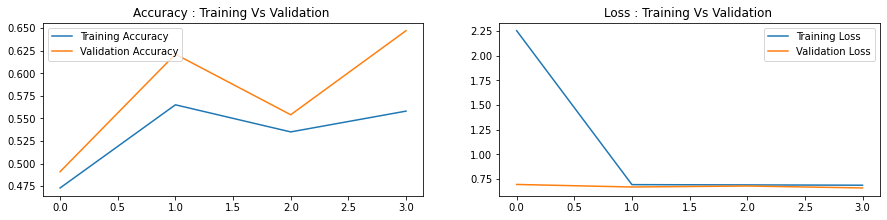

In [21]:
def cnn_model(df, train, test, my_callbacks):
    
    x_train =  img_datagen.flow_from_dataframe(dataframe = train,  x_col='Image_Path', y_col='Labels',  class_mode='binary',target_size=(134,134), shuffle=False, batch_size=10, seed=10, subset='training')
    x_test = img_datagen.flow_from_dataframe(dataframe = test,  x_col='Image_Path', y_col='Labels',class_mode='binary',  target_size=(134,134), shuffle=False, batch_size=10, seed=10, subset='validation')
    
    model = tf.keras.Sequential(
        [
          tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=(130,130,3) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=(130,130,3) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=(130,130,3) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=(130,130,3) ,filters=64, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dropout(rate=0.5),
          tf.keras.layers.Dense(1, activation='sigmoid')
  ])
    model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

    model_history = model.fit_generator(generator = x_train, 
                   steps_per_epoch = 100,
                   epochs = 4 ,
                   validation_data = x_test,
                   validation_steps = 100, callbacks=my_callbacks)
    
    return model_history

    
plot_loss_and_accuracy(cnn_model(df, train, test, my_callbacks))

# **Building Residual Network (ResNet50)**

Found 17638 validated image filenames belonging to 2 classes.
Found 1102 validated image filenames belonging to 2 classes.
Epoch 1/4
100/100 [==============================] - 232s 2s/step - loss: 0.6497 - accuracy: 0.7970 - val_loss: 8.1786 - val_accuracy: 0.6260
Epoch 2/4
100/100 [==============================] - 205s 2s/step - loss: 0.4475 - accuracy: 0.8850 - val_loss: 1.4284 - val_accuracy: 0.8890
Epoch 3/4
100/100 [==============================] - 201s 2s/step - loss: 0.4330 - accuracy: 0.8850 - val_loss: 3.5502 - val_accuracy: 0.8440
Epoch 4/4
100/100 [==============================] - 207s 2s/step - loss: 0.3076 - accuracy: 0.9290 - val_loss: 15.1812 - val_accuracy: 0.7040


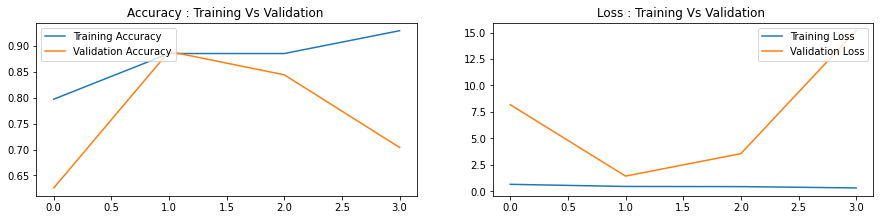

In [23]:
from tensorflow import keras
from keras import optimizers
def resnet_model(df, train, test, my_callbacks):
    x_train =  img_datagen.flow_from_dataframe(dataframe = train,  x_col='Image_Path', y_col='Labels',  class_mode='binary',target_size=(64,64), shuffle=False, batch_size=10, seed=10, subset='training')
    x_test = img_datagen.flow_from_dataframe(dataframe = test,  x_col='Image_Path', y_col='Labels',class_mode='binary',  target_size=(64,64), shuffle=False, batch_size=10, seed=10, subset='validation')
    
    resnet_model=resnet50.ResNet50(weights='imagenet',include_top=False,input_shape=(64,64,3))
    model=Sequential()
    model.add(resnet_model)
    model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['accuracy'])
    
    
    model_history = model.fit(
    x_train,
    steps_per_epoch=100,
    validation_data=x_test,
    validation_steps=100,
    epochs = 4, callbacks=my_callbacks)
    
    
    return model_history
    
plot_loss_and_accuracy(resnet_model(df, train, test, my_callbacks))

# **Building VGG 19 (Visual Geometry Group) MODEL**

Found 17637 validated image filenames belonging to 2 classes.
Found 1102 validated image filenames belonging to 2 classes.
Epoch 1/4
100/100 [==============================] - 1957s 20s/step - loss: 1.0057 - accuracy: 0.6170 - val_loss: 0.6930 - val_accuracy: 0.5070
Epoch 2/4
100/100 [==============================] - 1964s 20s/step - loss: 0.4789 - accuracy: 0.7690 - val_loss: 0.1751 - val_accuracy: 0.9380
Epoch 3/4
100/100 [==============================] - 1977s 20s/step - loss: 0.3458 - accuracy: 0.8950 - val_loss: 0.1738 - val_accuracy: 0.9550
Epoch 4/4
100/100 [==============================] - 1973s 20s/step - loss: 0.3447 - accuracy: 0.8980 - val_loss: 0.1993 - val_accuracy: 0.9430


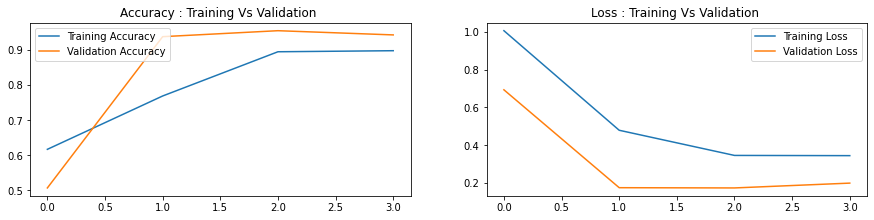

In [23]:
from tensorflow import keras
from keras import optimizers
def vgg19_model(df, train, test, my_callbacks):
    x_train =  img_datagen.flow_from_dataframe(dataframe = train,  x_col='Image_Path', y_col='Labels',  class_mode='binary',target_size=(224,224), shuffle=False, batch_size=10, seed=10, subset='training')
    x_test = img_datagen.flow_from_dataframe(dataframe = test,  x_col='Image_Path', y_col='Labels',class_mode='binary',  target_size=(224,224), shuffle=False, batch_size=10, seed=10, subset='validation')
    
    vgg19_model = VGG19(input_shape=(224,224,3), weights='imagenet',include_top=False)
    model=Sequential()
    model.add(vgg19_model)
    model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['accuracy'])
    
    model_history = model.fit(
    x_train,
    steps_per_epoch=100,
    validation_data=x_test,
    validation_steps=100, 
    epochs = 4 , callbacks=my_callbacks)
    
    return model_history
    
plot_loss_and_accuracy(vgg19_model(df, train, test, my_callbacks))

# **Building InceptionV3 MODEL**

Found 17637 validated image filenames belonging to 2 classes.
Found 1102 validated image filenames belonging to 2 classes.
Epoch 1/4
100/100 [==============================] - 3447s 35s/step - loss: 1.4360 - accuracy: 0.5330 - val_loss: 0.7306 - val_accuracy: 0.4970
Epoch 2/4
100/100 [==============================] - 3440s 34s/step - loss: 0.5396 - accuracy: 0.7640 - val_loss: 0.4547 - val_accuracy: 0.8640
Epoch 3/4
100/100 [==============================] - 3444s 35s/step - loss: 0.4762 - accuracy: 0.8980 - val_loss: 0.9734 - val_accuracy: 0.5880
Epoch 4/4
100/100 [==============================] - 3451s 35s/step - loss: 0.2803 - accuracy: 0.9350 - val_loss: 0.2499 - val_accuracy: 0.9440


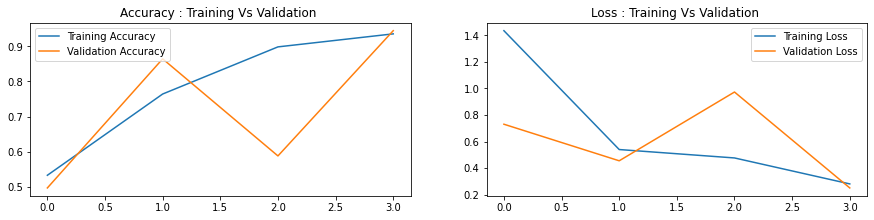

In [24]:
def inception_v3_model(df, train, test, my_callbacks):
    x_train =  img_datagen.flow_from_dataframe(dataframe = train,  x_col='Image_Path', y_col='Labels',  class_mode='binary',target_size=(299, 299), shuffle=False, batch_size=10, seed=10, subset='training')
    x_test = img_datagen.flow_from_dataframe(dataframe = test,  x_col='Image_Path', y_col='Labels',class_mode='binary',  target_size=(299, 299), shuffle=False, batch_size=10, seed=10, subset='validation')
    
    vgg19_model = VGG19(input_shape=(299, 299,3), weights='imagenet',include_top=False)
    model=Sequential()
    model.add(vgg19_model)
    model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['accuracy'])
    
    model_history = model.fit(
    x_train,
    steps_per_epoch=100,
    validation_data=x_test,
    validation_steps=100, 
    epochs = 4 , callbacks=my_callbacks)
    
    return model_history
    
plot_loss_and_accuracy(inception_v3_model(df, train, test, my_callbacks))

# **VGG 19 > Inception V3 > Resnet50 > CNN**